In [1]:
#Prabhat Thakur Date 05/04/2019
#2019SP_MSDS_458-DL_SEC56 Week5- Assignment2
#Compare different Deep Learning Networks for classification of MNIST grayscale images of handwritten digits.
#Code Addopted from F. Challot (2018), Deep Learning with Python (Manning)

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical

from keras import backend as K
from keras.layers.core import Activation

import matplotlib.pyplot as plt

# to make this notebook's output stable across runs
np.random.seed(42)

C:\Users\prabhatkumar\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def welcome ():
    print (' ' )
    print ('******************************************************************************')
    print (' ' )
    print ('This program examins training and validation set results of convolutional neural ')
    print ('networks with differing structures. It employs visualizations to examine the inner ')
    print ('workings of each network under study.')
    print ('Dataset used for Study: MNIST grayscale images of handwritten digits.')
    print (' ' )
    print ('******************************************************************************')
    print (' ' )
    return()

In [3]:
class DeepLearnModels:
    """Defines a simple convolutional neural net for MNIST"""

    def __init__(self, num_classes=10, input_shape=(28, 28, 1)):
        """Defines MNIST inputs and outputs"""
        self.num_classes = num_classes
        self.input_shape = input_shape
        self.model = None
        (self.train_images, self.train_labels) = (None, None)
        (self.test_images, self.test_labels) = (None, None)

    def load_data(self):
        """Load and format MNIST data"""

        print("Loading MNIST Data")

        # Load data
        (train_images, train_labels), (test_images, test_labels) = mnist.load_data()
        
        train_images1 = train_images.reshape((train_images.shape[0], self.input_shape[0] * self.input_shape[1]))
        test_images1 = test_images.reshape((test_images.shape[0], self.input_shape[0] * self.input_shape[1]))

        #train_images1 = train_images.reshape((60000, 28 * 28))
        self.train_images1 = train_images1.astype('float32') / 255

        #test_images1 = test_images.reshape((10000, 28 * 28))
        self.test_images1 = test_images1.astype('float32') / 255
        
        # Reshape X for use in TensorFlow
        train_images = train_images.reshape(train_images.shape[0], self.input_shape[0],
                                  self.input_shape[1], self.input_shape[2])
        test_images = test_images.reshape(test_images.shape[0], self.input_shape[0],
                                self.input_shape[1], self.input_shape[2])

        
        
        print(f"{self.input_shape[0]}x{self.input_shape[1]} image size")

        # Define the inputs as float & Normalize the inputs (MNIST in range (0, 255))
        self.train_images = train_images.astype('float32')/ 255
        self.test_images = test_images.astype('float32')/ 255

        # One hot encode labels
        self.train_labels = to_categorical(train_labels)
        self.test_labels = to_categorical(test_labels)

        return self

    
    def SNNmodel1(self):
        """Simple Neural Network"""

        print ('\n******************************************************************************')
        print("Model1 - Simple Neural Network, 1 hidden layer ")
        
        self.model = Sequential()
        self.model.add(Dense(512, activation='relu', input_shape=(28 * 28,),name='hidden1'))
        self.model.add(Dense(10, activation='softmax'))
        
        self.model.compile(optimizer='rmsprop',
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])
        
        self.model.fit(self.train_images1, self.train_labels, batch_size=128, epochs=10)
    
        score = self.model.evaluate(self.test_images1, self.test_labels)
        print(f"\nTest loss: {score[0]:.4f}")
        print(f"Test accuracy: {score[1]:.4f}")

        return self
    
    def CNNmodel1(self):
        """CNN - with 1 Conv layer and without dropout"""
        print ('\n******************************************************************************')   
        print("CNN Model1- with 1 Conv layer, no dropout layer and a fully connected dense layer of 64 nodes")

        self.model = Sequential()
        self.model.add(Conv2D(32, kernel_size=(3, 3),
                              input_shape=self.input_shape,
                              activation='relu',
                              name='conv1'))

        self.model.add(MaxPooling2D(pool_size=(2, 2), name='maxpool'))
        self.model.add(Flatten(name='flatten'))
        self.model.add(Dense(64, activation='relu', name='dense1'))
        self.model.add(Dense(self.num_classes, activation='softmax', name='output'))

        self.model.compile(loss=keras.losses.categorical_crossentropy,
                           optimizer=keras.optimizers.Adadelta(),
                           metrics=['accuracy'])

        return self

    def CNNmodel2(self):
        """CNN - with 1 Conv layer and dropout"""
        print ('\n******************************************************************************')
        print("CNN Model2- with 1 Conv layer, dropout layer and a fully connected dense layer of 64 nodes")

        self.model = Sequential()
        self.model.add(Conv2D(32, kernel_size=(3, 3),
                              input_shape=self.input_shape,
                              activation='relu',
                              name='conv1'))

        self.model.add(MaxPooling2D(pool_size=(2, 2), name='maxpool'))
        self.model.add(Dropout(0.25, name='dropout1'))
        self.model.add(Flatten(name='flatten'))
        self.model.add(Dense(64, activation='relu', name='dense1'))
        self.model.add(Dense(self.num_classes, activation='softmax', name='output'))

        self.model.compile(loss=keras.losses.categorical_crossentropy,
                           optimizer=keras.optimizers.Adadelta(),
                           metrics=['accuracy'])

        return self

    def CNNmodel3(self):
        """CNN - with 1 Conv layer and dropout"""
        print ('\n******************************************************************************')
        print("CNN Model3- with 1 Conv layer, dropout layer and a fully connected dense layer of 128 nodes")

        self.model = Sequential()
        self.model.add(Conv2D(32, kernel_size=(3, 3),
                              input_shape=self.input_shape,
                              activation='relu',
                              name='conv1'))

        self.model.add(MaxPooling2D(pool_size=(2, 2), name='maxpool'))
        self.model.add(Dropout(0.25, name='dropout1'))
        self.model.add(Flatten(name='flatten'))
        self.model.add(Dense(128, activation='relu', name='dense1'))
        self.model.add(Dense(self.num_classes, activation='softmax', name='output'))

        self.model.compile(loss=keras.losses.categorical_crossentropy,
                           optimizer=keras.optimizers.Adadelta(),
                           metrics=['accuracy'])

        return self

    
    def CNNmodel4(self):
        """CNN with two Convolutional layers"""
        print ('\n******************************************************************************')
        print("CNN Model4- with 2 Conv layer, no dropout layer and a fully connected dense layer of 128 nodes")

        self.model = Sequential()
        self.model.add(Conv2D(32, kernel_size=(3, 3),
                              input_shape=self.input_shape,
                              activation='relu',
                              name='conv1'))
        
        self.model.add(MaxPooling2D((2, 2)))
        self.model.add(Conv2D(64, (3, 3),
                              activation='relu',
                              name='conv2'))
        
        self.model.add(MaxPooling2D((2, 2)))
        self.model.add(Flatten())
        self.model.add(Dense(128, activation='relu', name='dense1'))
        self.model.add(Dense(self.num_classes, activation='softmax', name='output'))

        self.model.compile(loss=keras.losses.categorical_crossentropy,
                           optimizer=keras.optimizers.Adadelta(),
                           metrics=['accuracy'])

        return self        
        
    def CNNmodel5(self):
        """CNN with two Convolutional layers and dropout layers"""
        print ('\n******************************************************************************')
        print("CNN Model5- with 2 Conv layer, 2 dropout layer and a fully connected dense layer of 128 nodes")

        self.model = Sequential()
        self.model.add(Conv2D(32, kernel_size=(3, 3),
                              input_shape=self.input_shape,
                              activation='relu',
                              name='conv1'))
        
        self.model.add(MaxPooling2D((2, 2)))
        self.model.add(Dropout(0.25, name='dropout1'))
        
        self.model.add(Conv2D(64, (3, 3),
                              activation='relu',
                              name='conv2'))
        
        self.model.add(MaxPooling2D((2, 2)))
        self.model.add(Dropout(0.5, name='dropout2'))
        
        self.model.add(Flatten())
        self.model.add(Dense(128, activation='relu', name='dense1'))
        self.model.add(Dense(self.num_classes, activation='softmax', name='output'))

        self.model.compile(loss=keras.losses.categorical_crossentropy,
                           optimizer=keras.optimizers.Adadelta(),
                           metrics=['accuracy'])

        return self


    def train(self, batch_size=128, epochs=10):
        """Train model"""

        if self.train_images is None:
            self.load_data()

        if self.model is None:
            self.model1SNN()

        self.model.fit(self.train_images, self.train_labels,
                       batch_size=batch_size,
                       epochs=epochs)

        score = self.model.evaluate(self.test_images, self.test_labels)
        print(f"\nTest loss: {score[0]:.4f}")
        print(f"Test accuracy: {score[1]:.4f}")
        print ('******************************************************************************\n')
        return self

    def visualize(self, layer, image_number):
        """Visualize layer output"""

        # Define a function that gives layer output for a given input
        inputs = [K.learning_phase()] + self.model.inputs
        _layer_outputs = K.function(inputs, [layer.output])

        # Format data to see layer outputs
        def layer_outputs(image_data):
            """Removes the training phase flag"""
            return _layer_outputs([0] + [image_data])

        image = np.expand_dims(self.train_images[image_number], axis=0)
        layer_data = layer_outputs(image)
        layer_data = np.squeeze(layer_data)

        # Define grid shape of plots
        n = layer_data.shape[2]
        n = int(np.ceil(np.sqrt(n)))

        # Visualization of each filter of the layer
        fig = plt.figure(figsize=(12, 8))
        for i in range(layer_data.shape[2]):
            ax = fig.add_subplot(n, n, i+1)
            ax.imshow(layer_data[:, :, i], cmap='gray')

        plt.show()

 
******************************************************************************
 
This program examins training and validation set results of convolutional neural 
networks with differing structures. It employs visualizations to examine the inner 
workings of each network under study.
Dataset used for Study: MNIST grayscale images of handwritten digits.
 
******************************************************************************
 
Loading MNIST Data
28x28 image size

******************************************************************************
Model1 - Simple Neural Network, 1 hidden layer 
Epoch 1/10
60000/60000 [==============================] - 8s 135us/step - loss: 0.2562 - acc: 0.9251
Epoch 2/10
60000/60000 [==============================] - 7s 125us/step - loss: 0.1030 - acc: 0.9691
Epoch 3/10
60000/60000 [==============================] - 7s 125us/step - loss: 0.0674 - acc: 0.9792
Epoch 4/10
60000/60000 [==============================] - 8s 125us/step - loss: 0.0500 - acc:

60000/60000 [==============================] - 64s 1ms/step - loss: 0.0483 - acc: 0.9856
Epoch 5/10
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0392 - acc: 0.9878
Epoch 6/10
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0339 - acc: 0.9897
Epoch 7/10
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0283 - acc: 0.9911
Epoch 8/10
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0245 - acc: 0.9922
Epoch 9/10
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0215 - acc: 0.9934
Epoch 10/10
10000/10000 [==============================] - 4s 364us/step

Test loss: 0.0366
Test accuracy: 0.9880
******************************************************************************


******************************************************************************
CNN Model4- with 2 Conv layer, no dropout layer and a fully connected dense layer of 128 nodes
__________________________________________

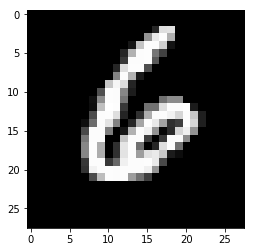

Convolutional Layer 1


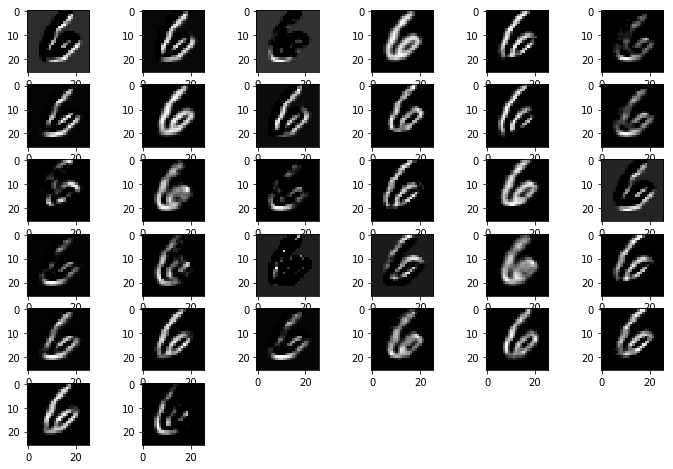

Convolutional Layer 2


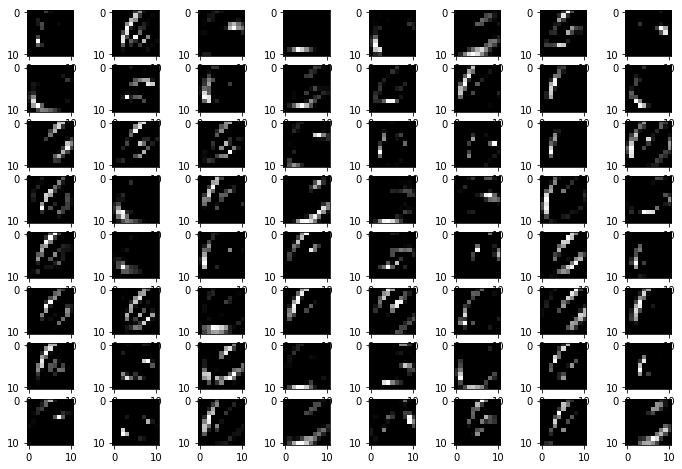

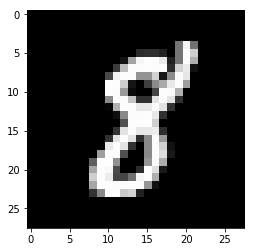

Convolutional Layer 1


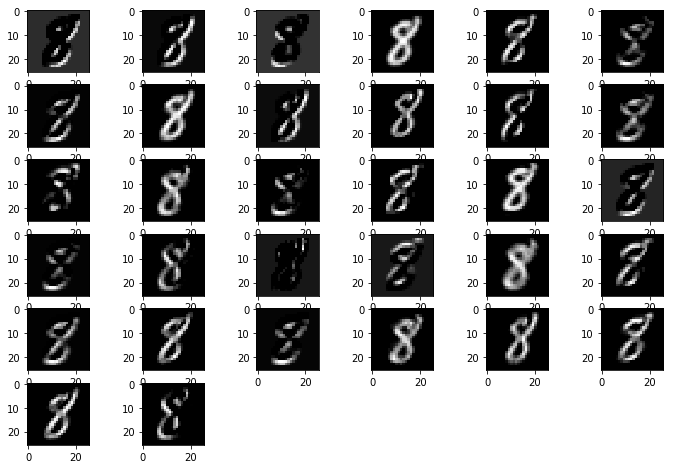

Convolutional Layer 2


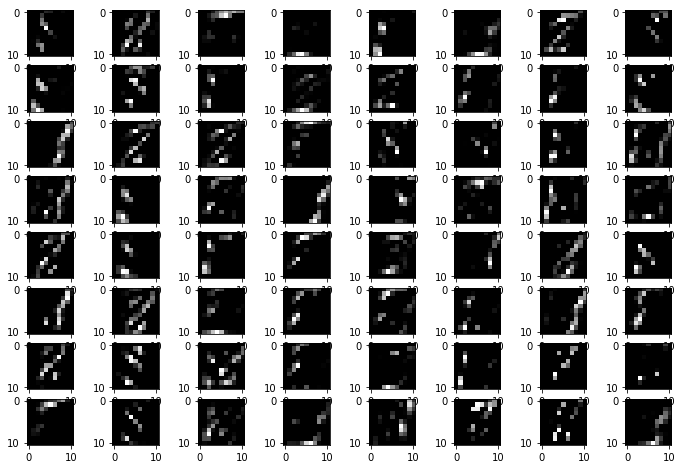


******************************************************************************
CNN Model5- with 2 Conv layer, 2 dropout layer and a fully connected dense layer of 128 nodes
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout1 (Dropout)           (None, 13, 13, 32)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout2 (Dropout)           (None

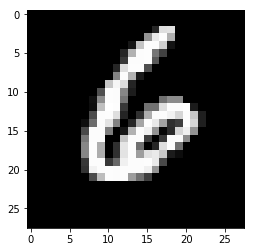

Convolutional Layer 1


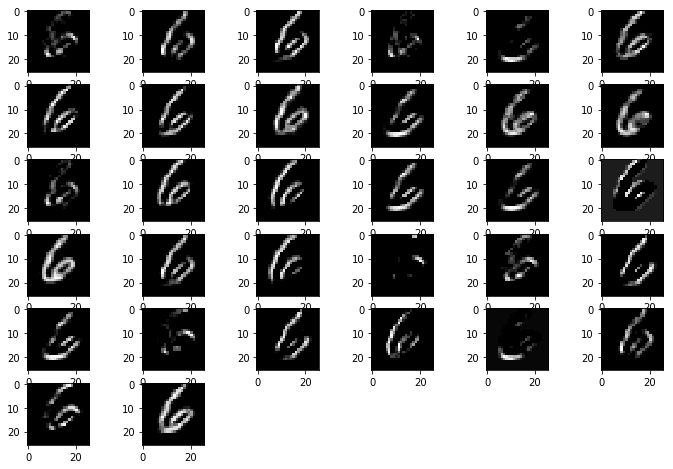

Convolutional Layer 2


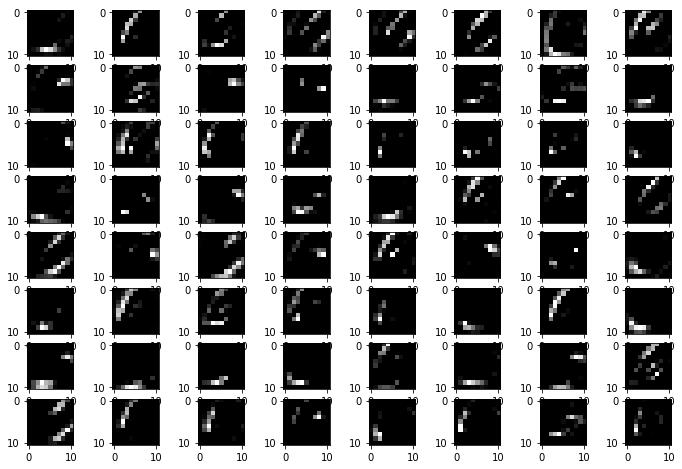

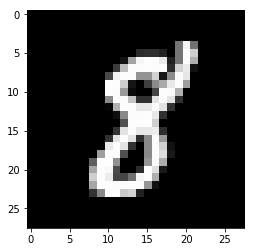

Convolutional Layer 1


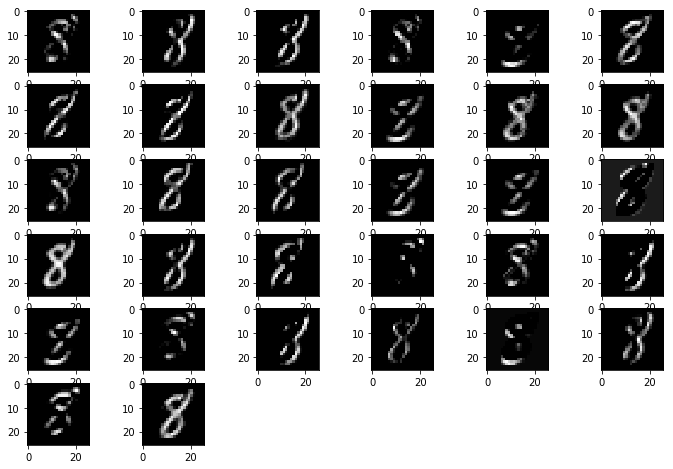

Convolutional Layer 2


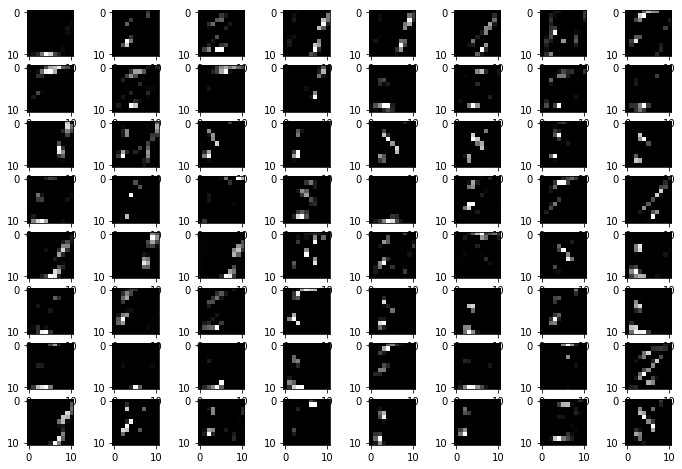

In [4]:
if __name__ == '__main__':

    welcome ()
    
    def main(images=[13, 41]):

        # Initialize and load data
        DeepLearnNN = DeepLearnModels()
        DeepLearnNN.load_data()

        # Display model structure
        DeepLearnNN.SNNmodel1()

        """Fit CNN models"""
        
        #Train CNN Model1- with 1 Conv layer, no dropout layer and a fully connected dense layer of 64 nodes.
        DeepLearnNN.CNNmodel1()
        DeepLearnNN.model.summary()
        DeepLearnNN.train()


        #Train CNN Model2- with 1 Conv layer, dropout layer and a fully connected dense layer of 64 nodes.
        DeepLearnNN.CNNmodel2()
        DeepLearnNN.model.summary()
        DeepLearnNN.train()

        # Train CNN Model3- with 1 Conv layer, dropout layer and a fully connected dense layer of 128 nodes.
        DeepLearnNN.CNNmodel3()
        DeepLearnNN.model.summary()
        DeepLearnNN.train()

        #Train CNN Model4- with 2 Conv layer, no dropout layer and a fully connected dense layer of 128 nodes.
        DeepLearnNN.CNNmodel4()
        DeepLearnNN.model.summary()
        DeepLearnNN.train()
        
        # Visualize the filters generated by the layers
        for i in images:
            # Display the image
            plt.imshow(DeepLearnNN.train_images[i][:, :, 0], cmap='gray')
            plt.show()

            # Display the first conv layer
            print("Convolutional Layer 1")
            DeepLearnNN.visualize(DeepLearnNN.model.get_layer('conv1'), i)

            # Display the second conv layer
            print("Convolutional Layer 2")
            DeepLearnNN.visualize(DeepLearnNN.model.get_layer('conv2'), i)
            
        #Train CNN Model5- with 2 Conv layer, 2 dropout layer and a fully connected dense layer of 128 nodes")
        DeepLearnNN.CNNmodel5()
        DeepLearnNN.model.summary()
        DeepLearnNN.train()

        # Visualize the filters generated by the layers
        for i in images:
            # Display the image
            plt.imshow(DeepLearnNN.train_images[i][:, :, 0], cmap='gray')
            plt.show()

            # Display the first conv layer
            print("Convolutional Layer 1")
            DeepLearnNN.visualize(DeepLearnNN.model.get_layer('conv1'), i)

            # Display the second conv layer
            print("Convolutional Layer 2")
            DeepLearnNN.visualize(DeepLearnNN.model.get_layer('conv2'), i)
            
        return DeepLearnNN

    main()